In [2]:
import sentencepiece as spm
from gensim.models import Word2Vec

In [3]:
# Load BPE model
sp_bpe = spm.SentencePieceProcessor()
sp_bpe.load("../tokenizer/spbpe_isc.model")

True

In [6]:
def tokenize_with_bpe(sp_bpe, words):
    bpe_tokenized = []
    for word in words:
        tokens = sp_bpe.encode(word, out_type=str)  # Adjust output type as needed
        bpe_tokenized.extend(tokens)  # Join tokens with space
    return bpe_tokenized

In [4]:
with open('../data/isc_sentences.txt', 'r') as f:
    sentences = f.readlines()

In [8]:
sentences_bpe = [tokenize_with_bpe(sp_bpe, sentence.split()) for sentence in sentences]

# Train Word2Vec model on BPE tokenized sentences
w2v_bpe = Word2Vec(sentences_bpe, vector_size=32, window=5, min_count=1, workers=4)

In [16]:
w2v_bpe.save("iscbpe2vec.model")

In [10]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def visualize_embeddings_2D(words, vectors, dimension='tsne'):
    """Visualize word vectors in 2D using t-SNE or PCA."""
    # Reduce dimensionality using t-SNE
    if dimension == 'tsne':
        perplexity = min(30, len(words) - 1)  # Ensure perplexity is less than the number of samples
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
        reduced_vectors = tsne.fit_transform(vectors)
    # Reduce dimensionality using PCA
    # elif dimension == 'pca':
    #     pca = PCA(n_components=2)
    #     reduced_vectors = pca.fit_transform(vectors)
    else:
        raise ValueError("Invalid dimension specified. Use 'tsne' or 'pca'.")

    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

    # Annotate each point with the corresponding word
    for i, word in enumerate(words):
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=9)

    plt.title(f'Visualización 2D de los vectores - BPE tokenizer y word2vec ({dimension.upper()})')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid()
    plt.show()

In [13]:
import random
word_list = list(w2v_bpe.wv.key_to_index.keys())
# Sample 20 words from the list
sampled_words = random.sample(word_list, 20)
# Get the word vectors for the sampled words
word_vectors = np.array([w2v_bpe.wv[word] for word in sampled_words])

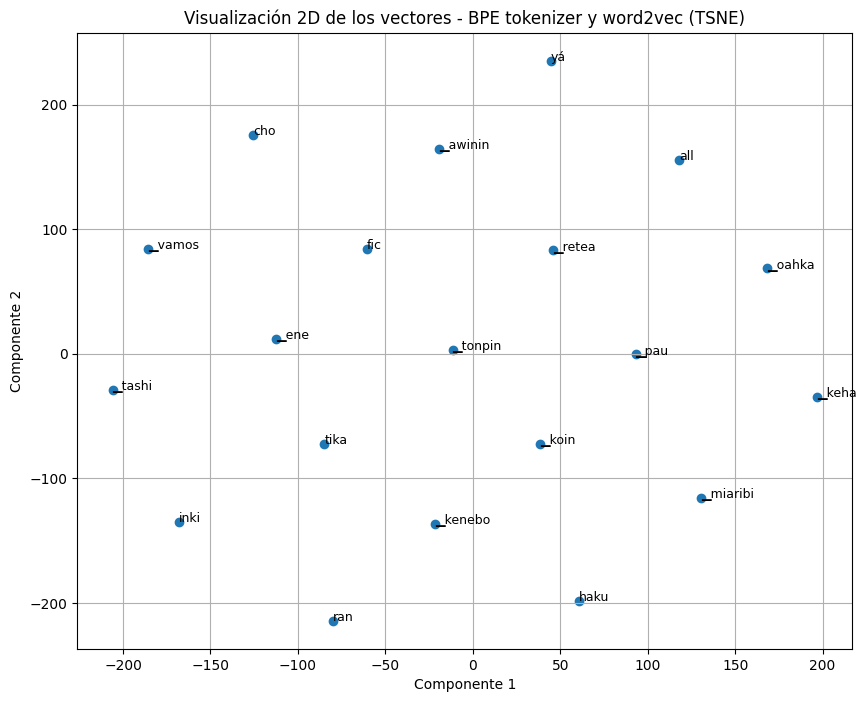

In [15]:
visualize_embeddings_2D(sampled_words,word_vectors)